# <p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Brain Stroke Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://www.sinakhan.com/media/photos/BrainAneurysm.jpg" style='width: 350px; height: 350px;'>
</p>

<p style="text-align:justify; ">
<B>Brain Stroke</B> happens when there is a blockage in the blood circulation in the brain or when a blood vessel in the brain breaks and leaks. The burst or blockage prevents blood and oxygen reaching the brain tissue. Without oxygen the tissues and cells in the brain are damaged and die in no time leading to many symptoms.<br>
<br>    
Once brain cells die, they generally do not regenerate and devastating damage may occur, sometimes resulting in physical, cognitive and mental disabilities. It is crucial that proper blood flow and oxygen be restored to the brain as soon as possible.<br>
<br>    
Worldwide, brain stroke is the second leading cause of death and third leading cause of disability. In some cases, the warning signs of a stroke can be obvious but what’s going on inside the body is incredibly complex. 80% of strokes are preventable. But once you’ve had a stroke, the chances you have another one are greater. 
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents 
|:---| :---     
|1   | [<font color="#9FD7F9"> Importing Libraries</font>](#1)             
|2   | [<font color="#9FD7F9"> About Dataset</font>](#2)                   
|3   | [<font color="#9FD7F9"> Dataset Preprocessing</font>](#3)               
|4   | [<font color="#9FD7F9"> Correlation Map</font>](#4)        
|5   | [<font color="#9FD7F9"> Model Creation & Performance Evaluation</font>](#5)             
|6   | [<font color="#9FD7F9"> Thank You</font>](#6)

<a id="1"></a>
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels

<a id="2"></a>
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **id:** Unique identifier
* **gender:** Gender of the patient (Male, Female, Other)
* **age:** Age of the patient
* **hypertension:** **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
* **heart_disease:** **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
* **ever_married:** **Yes** if the patient is married, **No** if the patient is not married 
* **work_type:** Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)
* **Residence_type:** Residence category of the patient (Rural, Urban)
* **avg_glucose_level:** Average glucose level in blood of the patient
* **bmi:** Body Mass Index of the patient
* **smoking_status:** Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). **Unknown** in **smoking_status** means that the information is unavailable for this patient
* **stroke:** **1** if the patient had a stroke or **0** if not


df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<a id="3"></a>
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Preprocessing</p>

,Total,Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000


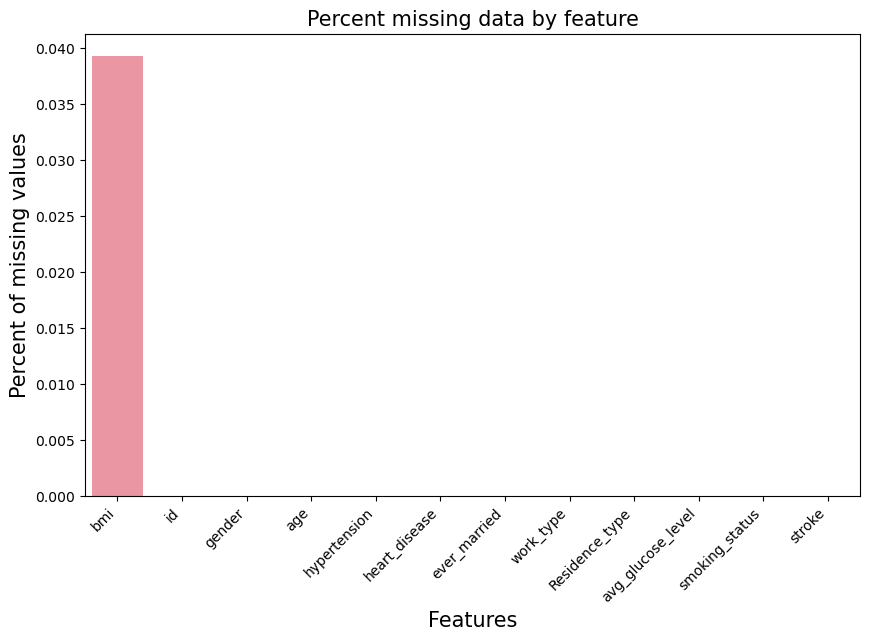

In [7]:
#Create table info Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


# Create a bar plot
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'], ax=ax)

# Set ticks and labels
ax.set_xticks(range(len(missing_data.index)))
ax.set_xticklabels(missing_data.index, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()


In [8]:
a = df.isnull().mean()*100
print(a)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


<h3> Here, we see that the NA value of column "bmi" accounts for 3.933464% of the total value.

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df_new = df.drop('id', axis = 1)

In [11]:
df_new.shape

(5110, 11)

In [12]:
df_new.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


<h3> Case 1: Replace the NA value with the Mean value

In [13]:
th1 = df_new.fillna(df_new.mean(numeric_only=True))

In [14]:
th1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
th1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
a = th1.nunique()
print(a)

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64


In [17]:
for column in df_new.columns:
    unique_values = th1[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Column: age
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

Column: hypertension
hypertension
0    4612
1     498
Name: count, dtype: int64

Column: heart_disease
heart_disease
0    4834
1     276
Name: count, dtype: int64

Column: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Column: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Column: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Column: avg_glucose_level
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 397

<h2> Process Data 1

In [18]:
a = pd.get_dummies(th1)
a.head(15)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.000000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
6,74.0,1,1,70.09,27.400000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
7,69.0,0,0,94.39,22.800000,1,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
8,59.0,0,0,76.15,28.893237,1,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
9,78.0,0,0,58.57,24.200000,1,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False


<a id="4"></a>
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

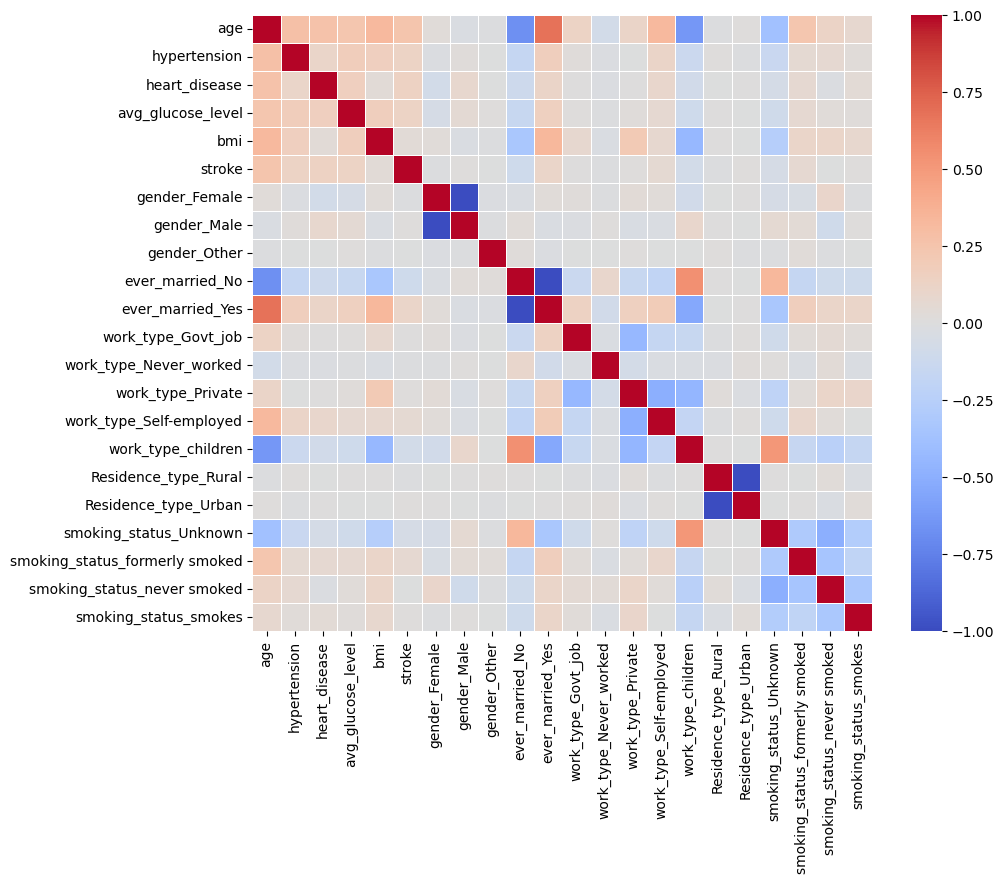

In [19]:
plt.figure(figsize=(10, 8))
hm1 = sns.heatmap(a.corr(), cmap='coolwarm', linewidths=.5)
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


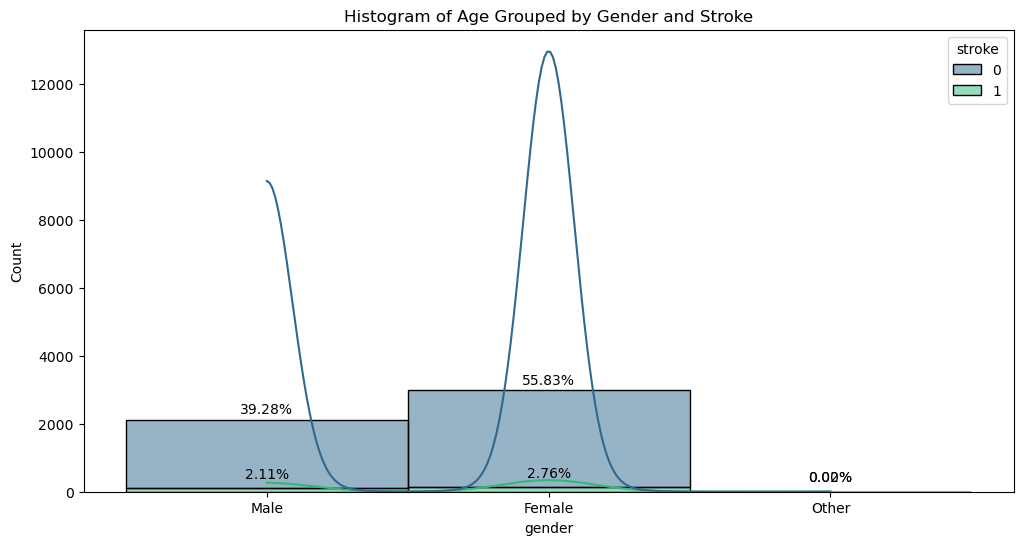

In [20]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=th1, x='gender', hue='stroke', multiple='stack', bins=20, palette='viridis', kde=True)
plt.title('Histogram of Age Grouped by Gender and Stroke')

# Tính phần trăm và hiển thị văn bản
total = len(th1['Residence_type'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


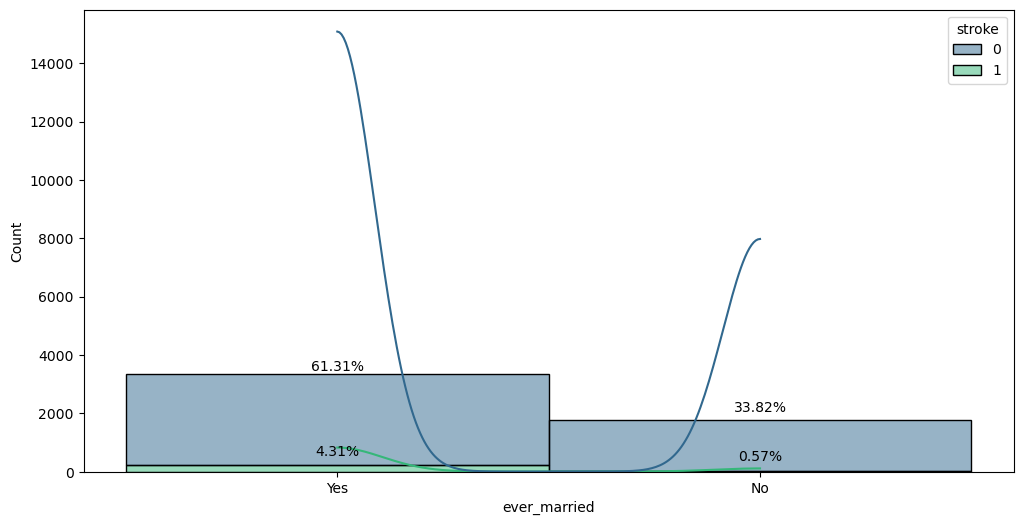

In [21]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=th1, x='ever_married', hue='stroke', multiple='stack', bins=20, palette='viridis', kde=True)

# Tính phần trăm và hiển thị văn bản
total = len(th1['Residence_type'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


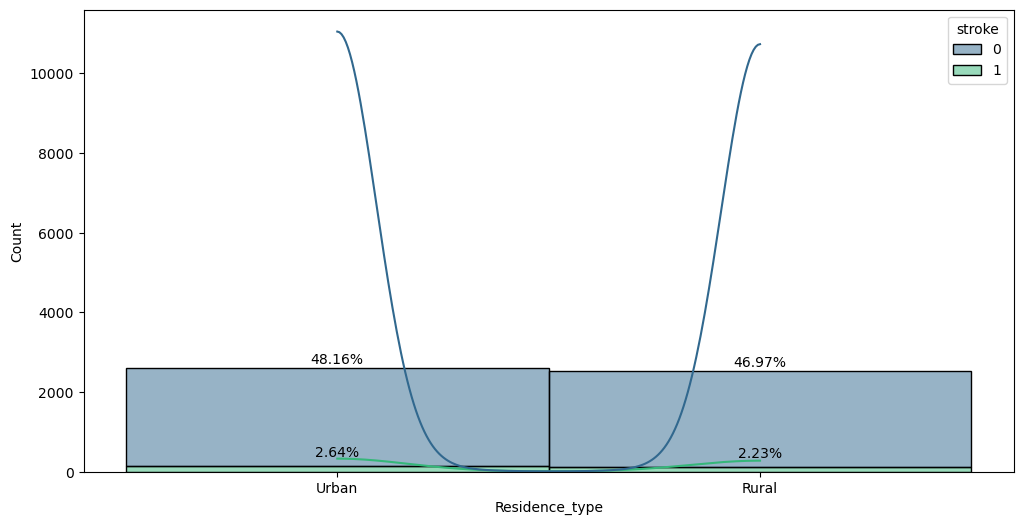

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=th1, x='Residence_type', hue='stroke', multiple='stack', bins=20, palette='viridis', kde=True)

# Tính phần trăm và hiển thị văn bản
total = len(th1['Residence_type'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


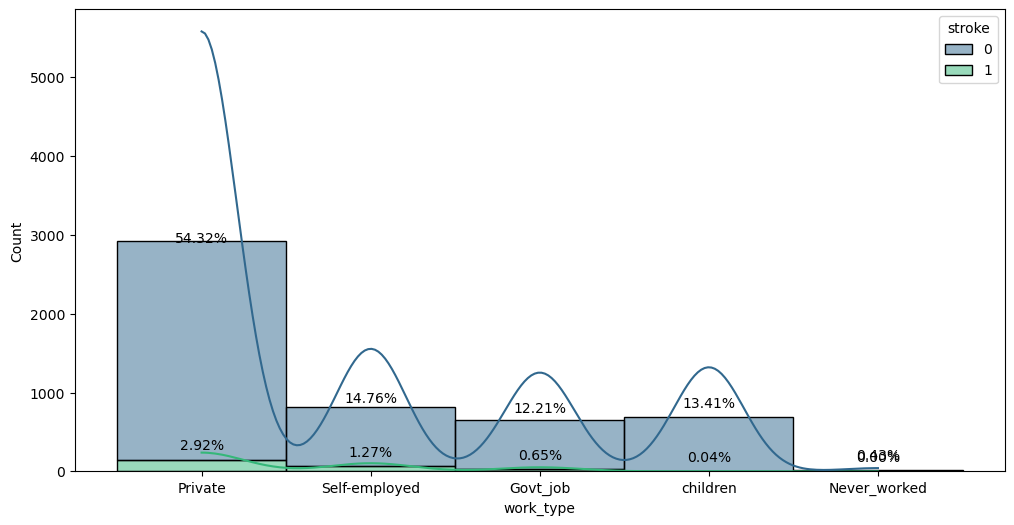

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=th1, x='work_type', hue='stroke', multiple='stack', bins=20, palette='viridis', kde=True)
# Tính phần trăm và hiển thị văn bản
total = len(th1['Residence_type'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


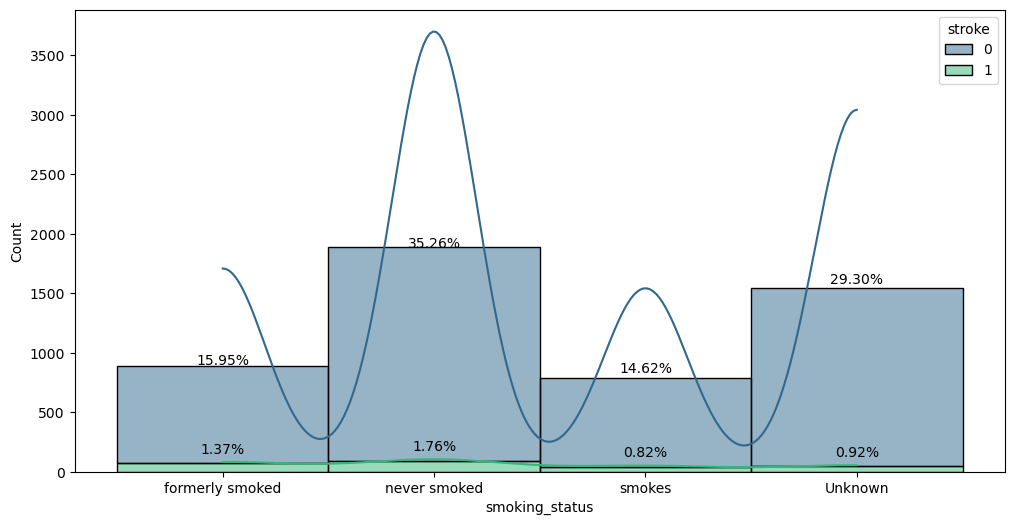

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=th1, x='smoking_status', hue='stroke', multiple='stack', bins=20, palette='viridis', kde=True)

# Tính phần trăm và hiển thị văn bản
total = len(th1['Residence_type'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

In [25]:
a.shape

(5110, 22)

In [26]:
a.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

<a id="5"></a>
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

In [27]:
X = a.drop(['stroke'], axis=1)
y = a['stroke']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [30]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [31]:
X_train.shape, X_test.shape

((3577, 21), (1533, 21))

In [32]:
y_train.shape, y_test.shape

((3577,), (1533,))

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [34]:
sel = SelectFromModel(LogisticRegression(penalty="l1", C=10, solver='liblinear'))

In [35]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=10, penalty='l1',
                                             solver='liblinear'))

In [36]:
X_train1 = sel.transform(X_train)
X_test1 = sel.transform(X_test)

In [37]:
sel.get_feature_names_out()

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

In [38]:
X_train1.shape, X_train.shape

((3577, 19), (3577, 21))

In [39]:
glm = LogisticRegression()
glm.fit(X_train1, y_train)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = glm.predict(X_test1)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
acc = accuracy_score(y_test, y_pred)

In [44]:
print(f'Predict: {acc*100}%')

Tỷ lệ dự đoán: 95.49902152641879%


<h2>Case 2: Replace Na values ​​with Common values

In [45]:
th2 = df_new.fillna(df.mode().iloc[0])

In [46]:
th2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [47]:
b = pd.get_dummies(th2)
b.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.7,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


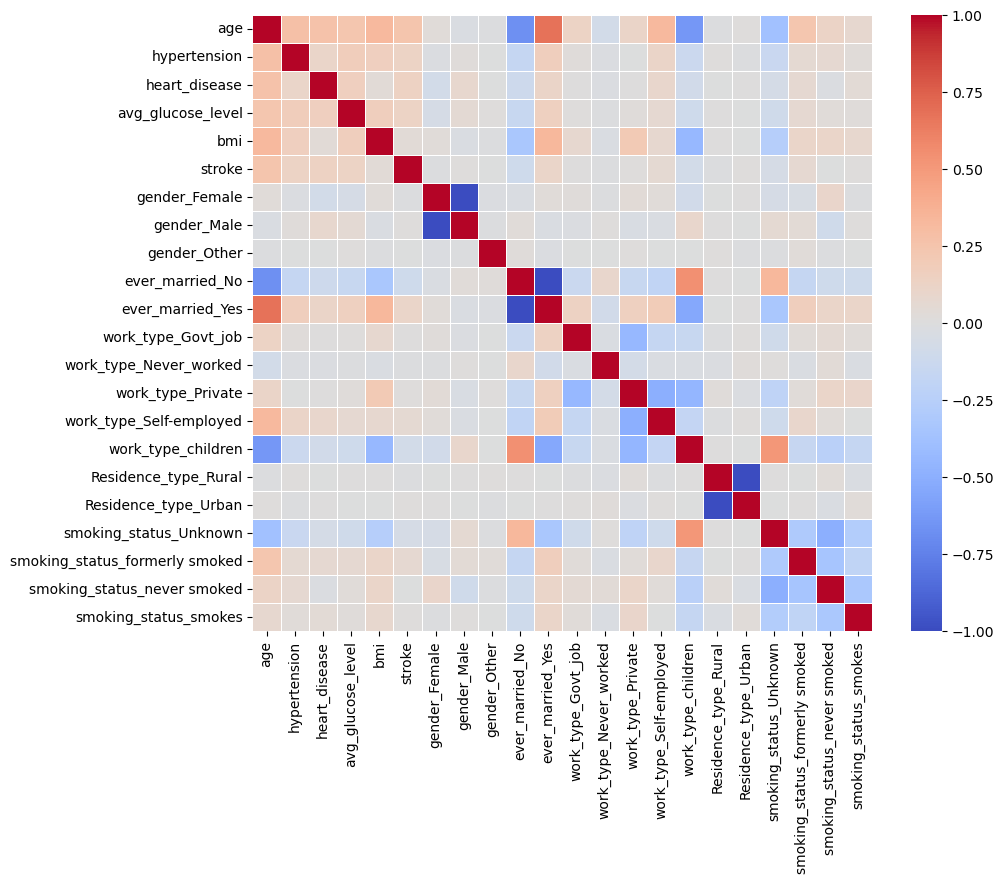

In [48]:
plt.figure(figsize=(10, 8))
hm1 = sns.heatmap(b.corr(), cmap='coolwarm', linewidths=.5)
plt.show()

In [49]:
X = b.drop(['stroke'], axis=1)
y = b['stroke']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [51]:
sel = SelectFromModel(LogisticRegression(penalty="l1", C=10, solver='liblinear'))

In [52]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=10, penalty='l1',
                                             solver='liblinear'))

In [53]:
X_train2 = sel.transform(X_train)
X_test2 = sel.transform(X_test)

In [54]:
sel.get_feature_names_out()

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [55]:
X_train.shape, X_train2.shape

((3577, 21), (3577, 18))

In [56]:
glm = LogisticRegression()
glm.fit(X_train2, y_train)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = glm.predict(X_test2)

In [58]:
acc = accuracy_score(y_test, y_pred)

In [60]:
print(f'Predict: {acc*100}%')

Predict: 95.49902152641879%


<a id="6"></a>
<p style="padding:10px;background-color:#9FD7F9;margin:0;color:#000000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">THANK YOU SO MUCH</p>